# Dataloader for DAVIS Challenge (python3)
## 1. Get dataloader code

In [2]:
!git clone https://github.com/lupries/davis2017-evaluation.git

import sys
sys.path.append('/content/davis2017-evaluation/davis2017')

Cloning into 'davis2017-evaluation'...
remote: Enumerating objects: 6136, done.
remote: Counting objects: 100% (6136/6136), done.
remote: Compressing objects: 100% (5574/5574), done.
remote: Total 6136 (delta 572), reused 6114 (delta 556), pack-reused 0
Receiving objects: 100% (6136/6136), 18.48 MiB | 25.17 MiB/s, done.
Resolving deltas: 100% (572/572), done.


## (1.) Update dataloader code

In [3]:
%cd davis2017-evaluation/
!git status
!git pull origin master
%cd ..

/content/davis2017-evaluation
On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
From https://github.com/lupries/davis2017-evaluation
 * branch            master     -> FETCH_HEAD
Already up to date.
/content


## 2. Get dataset

In [4]:
!git clone https://github.com/davisvideochallenge/davis-2017.git
%cd davis-2017/data
!ls && ./get_davis.sh
%cd ..
%cd ..

Cloning into 'davis-2017'...
remote: Enumerating objects: 1192, done.
remote: Total 1192 (delta 0), reused 0 (delta 0), pack-reused 1192
Receiving objects: 100% (1192/1192), 5.15 MiB | 36.09 MiB/s, done.
Resolving deltas: 100% (420/420), done.
/content/davis-2017/data
davis.png  db_info.yaml  get_davis_results.sh  get_davis.sh  palette.txt
--2019-11-26 20:48:17--  https://data.vision.ee.ethz.ch/jpont/davis/DAVIS-2017-trainval-480p.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 832766765 (794M) [application/zip]
Saving to: ‘DAVIS-2017-trainval-480p.zip’

DAVIS-2017-trainval 100%[===================>] 794.19M  19.7MB/s    in 42s     

2019-11-26 20:49:00 (18.9 MB/s) - ‘DAVIS-2017-trainval-480p.zip’ saved [832766765/832766765]

--2019-11-26 20:49:00--  https://data.vision.ee.ethz.ch/jpont/davis/DAVIS-2017-te

## 3. Dataloader
``davis2016 = DAVIS(root='davis-2017/data/DAVIS', subset=s, task='semi-supervised')`` \
Sequences (eg. 'bear, 'boat', 'bus', ...) \
``davis2016.get_sequences()`` \
Frame Iterator \
``seq = dataset.get_sequences()`` \
Frame \
``img, mask = next(seq)``

## 4. Show Examples

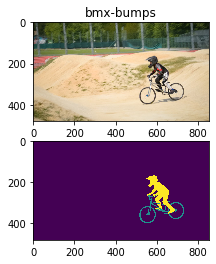

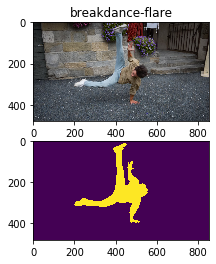

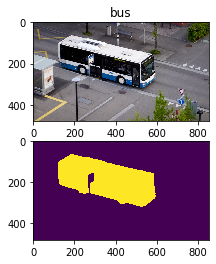

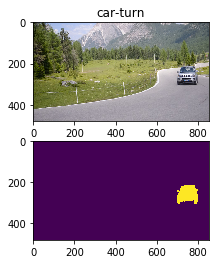

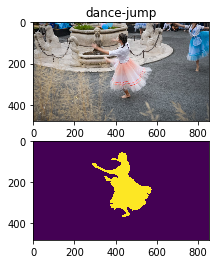

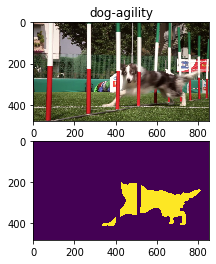

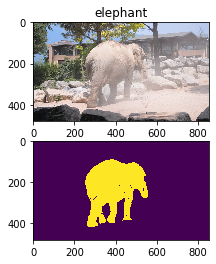

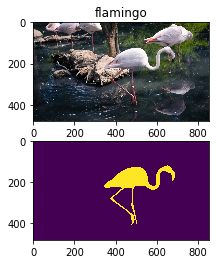

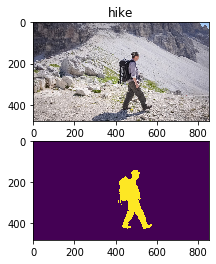

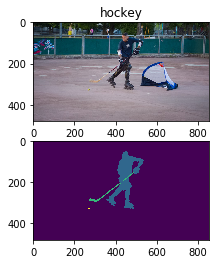

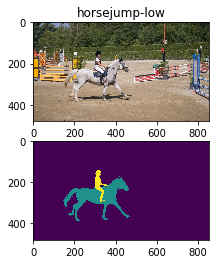

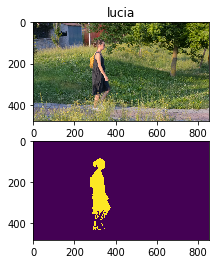

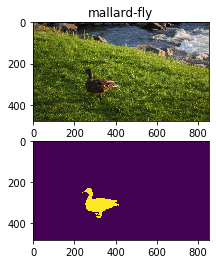

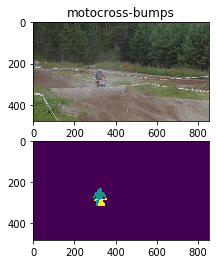

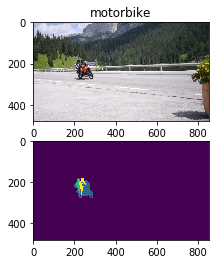

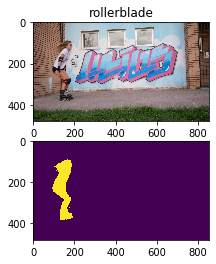

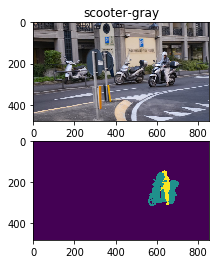

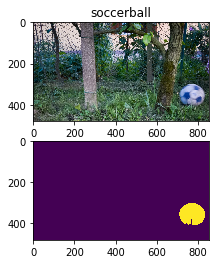

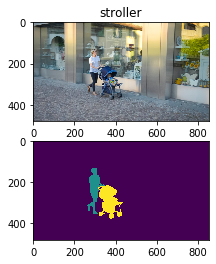

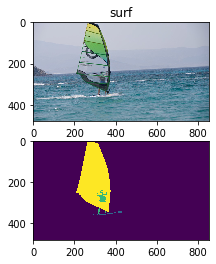

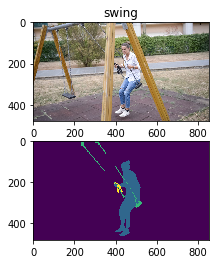

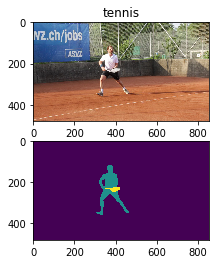

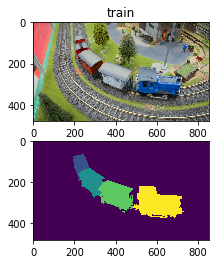

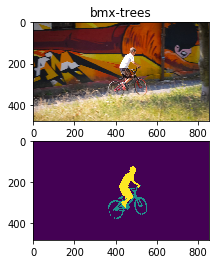

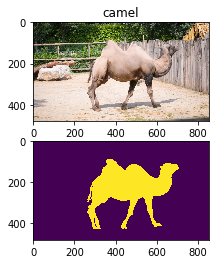

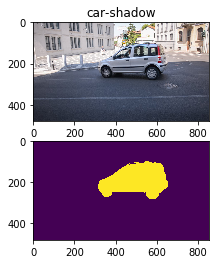

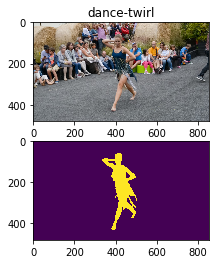

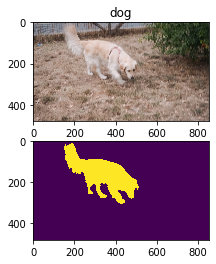

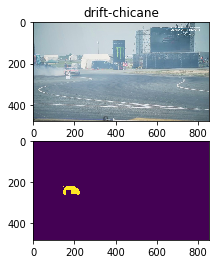

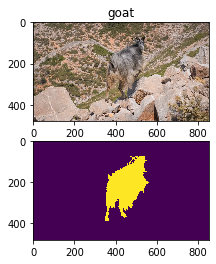

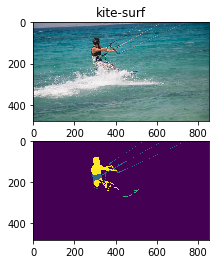

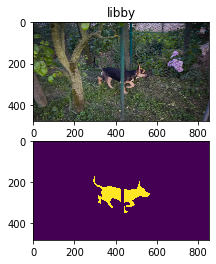

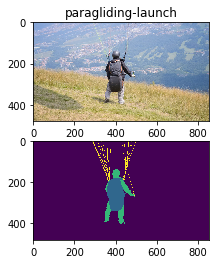

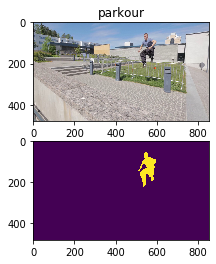

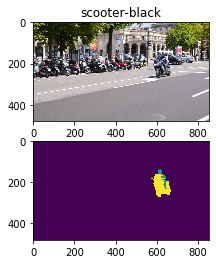

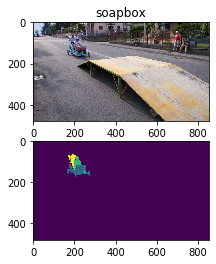

In [5]:
from davis import DAVIS
from matplotlib import pyplot as plt

only_first_frame = True
subsets = ['train', 'val']

for s in subsets:
        dataset = DAVIS(root='davis-2017/data/DAVIS', subset=s, task='semi-supervised')
        for seq in dataset.get_sequences():
            g = dataset.get_frames(seq)
            img, mask = next(g)
            plt.subplot(2, 1, 1)
            plt.title(seq)
            plt.imshow(img)
            plt.subplot(2, 1, 2)
            plt.imshow(mask)
            plt.show(block=True)

## 5. List of Sequences (train set)

In [6]:
dataset = DAVIS(root='davis-2017/data/DAVIS', subset='train', task='semi-supervised')
for seg in dataset.get_sequences():
  print(seg)

bear
bmx-bumps
boat
breakdance-flare
bus
car-turn
dance-jump
dog-agility
drift-turn
elephant
flamingo
hike
hockey
horsejump-low
kite-walk
lucia
mallard-fly
mallard-water
motocross-bumps
motorbike
paragliding
rhino
rollerblade
scooter-gray
soccerball
stroller
surf
swing
tennis
train


Example Sequence (bear)

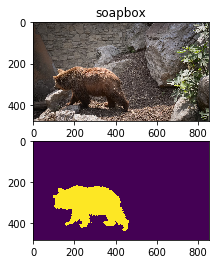

In [7]:
bear = dataset.get_frames("bear")
img, mask = next(bear)
plt.subplot(2, 1, 1)
plt.title(seq)
plt.imshow(img)
plt.subplot(2, 1, 2)
plt.imshow(mask)
plt.show(block=True)

# 6. Deeplabv3

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (N, 3, H, W), where N is the number of images, H and W are expected to be at least 224 pixels. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].


The model returns an OrderedDict with two Tensors that are of the same height and width as the input Tensor, but with 21 classes. output['out'] contains the semantic masks, and output['aux'] contains the auxillary loss values per-pixel. In inference mode, output['aux'] is not useful. So, output['out'] is of shape (N, 21, H, W).

In [0]:
import numpy as np

def label_img_to_rgb(label_img):
    label_img = np.squeeze(label_img)
    labels = np.unique(label_img)
    label_infos = [l for l in SEG_LABELS_LIST if l['id'] in labels]

    label_img_rgb = np.array([label_img,
                              label_img,
                              label_img]).transpose(1,2,0)
    for l in label_infos:
        mask = label_img == l['id']
        label_img_rgb[mask] = l['rgb_values']

    return label_img_rgb.astype(np.uint8)


(480, 854, 3)
torch.Size([3, 480, 854])
[[[[-0.01366294 -0.01366294 -0.01366294 ... -0.01012333 -0.01012333
    -0.01012333]
   [-0.01366294 -0.01366294 -0.01366294 ... -0.01012333 -0.01012333
    -0.01012333]
   [-0.01366294 -0.01366294 -0.01366294 ... -0.01012333 -0.01012333
    -0.01012333]
   ...
   [-0.00773283 -0.00773283 -0.00773283 ... -0.00724882 -0.00724882
    -0.00724882]
   [-0.00773283 -0.00773283 -0.00773283 ... -0.00724882 -0.00724882
    -0.00724882]
   [-0.00773283 -0.00773283 -0.00773283 ... -0.00724882 -0.00724882
    -0.00724882]]]]


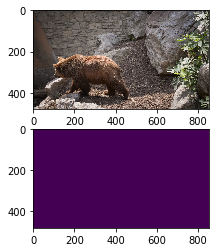

In [105]:
import torch
from PIL import Image
from torchvision import transforms, models
model = models.segmentation.deeplabv3_resnet101(pretrained = True)
model.classifier = models.segmentation.deeplabv3.DeepLabHead(2048, num_classes=1)
model.eval()

bear = dataset.get_frames("bear")
input_image, mask = next(bear)
plt.subplot(2, 1, 1)
plt.imshow(input_image)
print(input_image.shape)
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
print(input_tensor.size())
# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out']
    _, preds = torch.max(output, 1)
    pred = preds[0].data.cpu()
    pred = pred.numpy()

print(output.cpu().detach().numpy())
plt.subplot(2, 1, 2)
plt.imshow(output.cpu().detach().numpy()[0][0]>0.1)
# create a color pallette, selecting a color for each class
#palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
#colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
#colors = (colors % 255).numpy().astype("uint8")

#shape = list(input_tensor.size())


# plot the semantic segmentation predictions of 21 classes in each color
#print(shape[1:])
#r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(shape[2:0:-1])
#r.putpalette(colors)


#plt.show()